In [1]:
import os
import sys
import csv
import time
import torch
import random
from transformers import AutoTokenizer, AutoModel

import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
max_length = 512

In [2]:
# load a reference set
df = pd.read_csv('../data/ref0_clinical_bert_reference_set.txt')
df.head()

,drug,llt_id,llt,class,string
0,DOTAREM,1197995,asat,not_event,asat reaction rate (%) n=2813 nausea 0.6% head...
1,DOTAREM,35204924,arrhythmia,is_event,arrhythmia 6.2 postmarketing experience the fo...
2,DOTAREM,35204928,bradycardia,is_event,bradycardia without treatment. 6.2 postmarketi...
3,DOTAREM,35204948,tachycardia,is_event,tachycardia treatment. 6.2 postmarketing exper...
4,DOTAREM,35204966,cardiac arrest,is_event,cardiac arrest been identified during postmark...


In [3]:
# load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('../models/Bio_ClinicalBERT/')

In [30]:
counts = list()
for text in tqdm(df['string']):
    tokens = tokenizer(text, padding='max_length', max_length=max_length, truncation=True, return_tensors='pt')
    nwords = len(text.split())
    ntokens = (tokens['input_ids'].numpy()!=0).sum()
    counts.append( (nwords, ntokens) )

100%|██████████| 113397/113397 [00:53<00:00, 2119.63it/s]


(62.60844643156344, 115.08418212122014)

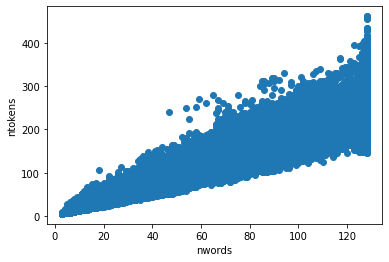

In [32]:
nwords, ntokens = zip(*counts)
plt.scatter(nwords, ntokens)
plt.xlabel('nwords')
plt.ylabel('ntokens')
np.mean(nwords), np.mean(ntokens)

(1.8450337825440766, 1.778688524590164)

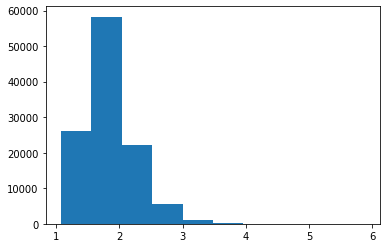

In [36]:
plt.hist(np.array(ntokens)/np.array(nwords))
np.mean(np.array(ntokens)/np.array(nwords)), np.median(np.array(ntokens)/np.array(nwords))

In [41]:
ratios = np.array(ntokens)/np.array(nwords)
np.percentile(ratios, 75)

2.046875